In [ ]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [ ]:
cropdf = pd.read_csv("br_jh_up.csv")
cropdf.head()

,N,P,K,rainfall,temperature,humidity,ph,label
0,80,40,40,1200,25.0,70,6.5,Rice
1,100,60,60,1100,26.0,75,6.2,Rice
2,120,80,80,1300,28.0,80,6.8,Rice
3,140,100,100,1400,30.0,85,7.2,Rice
4,160,120,120,1500,32.0,90,7.5,Rice


In [ ]:
cropdf.shape

(310, 8)

In [ ]:
cropdf.columns

Index(['N', 'P', 'K', 'rainfall', 'temperature', 'humidity', 'ph', 'label'], dtype='object')

In [ ]:
cropdf.isnull().any()

N              False
P              False
K              False
rainfall       False
temperature    False
humidity       False
ph             False
label          False
dtype: bool

In [ ]:
print("Number of various crops: ", len(cropdf['label'].unique()))
print("List of crops: ", cropdf['label'].unique())

Number of various crops:  7
List of crops:  ['Rice' 'Wheat' 'Maize' 'Mustard' 'Sugarcane' 'Pulses' 'Oilseeds']


In [ ]:
cropdf['label'].value_counts()

Rice         115
Wheat         67
Maize         63
Oilseeds      25
Sugarcane     20
Pulses        12
Mustard        8
Name: label, dtype: int64

In [ ]:
crop_summary = pd.pivot_table(cropdf,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
Maize,67.095238,119.444444,46.571429,71.952381,6.482540,992.857143,26.000000
Mustard,80.000000,86.250000,72.500000,77.500000,6.612500,1350.000000,28.125000
Oilseeds,50.200000,100.800000,39.800000,70.800000,6.480000,898.000000,24.840000
Pulses,50.833333,99.583333,40.416667,70.666667,6.491667,891.666667,24.625000
Rice,189.217391,232.000000,186.956522,76.478261,6.911304,1976.086957,32.034783


In [ ]:
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:7].sort_values().index,
    'x' : crop_summary_N['N'][0:7].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-7:].index,
    'x' : crop_summary_N['N'][-7:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


In [ ]:
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P'][0:7].sort_values().index,
    'x' : crop_summary_P['P'][0:7].sort_values()
}

last = {
    'y' : crop_summary_P['P'][-7:].index,
    'x' : crop_summary_P['P'][-7:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


In [ ]:
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:7].sort_values().index,
    'x' : crop_summary_K['K'][0:7].sort_values()
}

last = {
    'y' : crop_summary_K['K'][-7:].index,
    'x' : crop_summary_K['K'][-7:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [ ]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
fig = make_subplots(rows=1, cols=7, specs=[[{'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}]])

Maize_npk = crop_summary[crop_summary.index=='Maize']
values = [Maize_npk['N'][0], Maize_npk['P'][0], Maize_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Maize"),1, 1)

Mustard_npk = crop_summary[crop_summary.index=='Mustard']
values = [Mustard_npk['N'][0], Mustard_npk['P'][0], Mustard_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Mustard"),1, 2)

Oilseeds_npk = crop_summary[crop_summary.index=='Oilseeds']
values = [Oilseeds_npk['N'][0], Oilseeds_npk['P'][0], Oilseeds_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Oilseeds"),1, 3)

Pulses_npk = crop_summary[crop_summary.index=='Pulses']
values = [Pulses_npk['N'][0], Pulses_npk['P'][0], Pulses_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Pulses"),1, 4)

Rice_npk = crop_summary[crop_summary.index=='Rice']
values = [Rice_npk['N'][0], Rice_npk['P'][0], Rice_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Rice"),1, 5)

Sugarcane_npk = crop_summary[crop_summary.index=='Sugarcane']
values = [Sugarcane_npk['N'][0], Sugarcane_npk['P'][0], Sugarcane_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Sugarcane"),1, 6)

Wheat_npk = crop_summary[crop_summary.index=='Wheat']
values = [Wheat_npk['N'][0], Wheat_npk['P'][0], Wheat_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Wheat"),1, 7)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="NPK ratio for Maize, Mustard, Oilseeds, Pulses, Rice, Sugarcane, Wheat",
    annotations=[dict(text='Maize',x=0.01,y=0.8, font_size=15, showarrow=False),
                 dict(text='Mustard',x=0.15,y=0.8, font_size=15, showarrow=False),
                 dict(text='Oilseeds',x=0.30,y=0.8, font_size=15, showarrow=False),
                 dict(text='Pulses',x=0.49,y=0.8, font_size=15, showarrow=False),
                dict(text='Rice',x=0.64,y=0.8, font_size=15, showarrow=False),
                dict(text='Sugarcane',x=0.86,y=0.8, font_size=15, showarrow=False),
                dict(text='Wheat',x=0.98,y=0.8, font_size=15, showarrow=False)])
fig.show()


In [ ]:
crop_scatter = cropdf[(cropdf['label']=='Maize') |
                      (cropdf['label']=='Mustard') |
                      (cropdf['label']=='Oilseeds') |
                     (cropdf['label']=='Pulses') |
                      (cropdf['label']=='Rice') |
                      (cropdf['label']=='Sugarcane') |
                     (cropdf['label']=='Wheat')]

fig = px.scatter(crop_scatter, x="temperature", y="humidity", color="label", symbol="label")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
fig = px.bar(crop_summary, x=crop_summary.index, y=["rainfall", "temperature", "humidity"])
fig.update_layout(title_text="Comparision between rainfall, temerature and humidity",
                  plot_bgcolor='white',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<Axes: xlabel='K', ylabel='Count'>

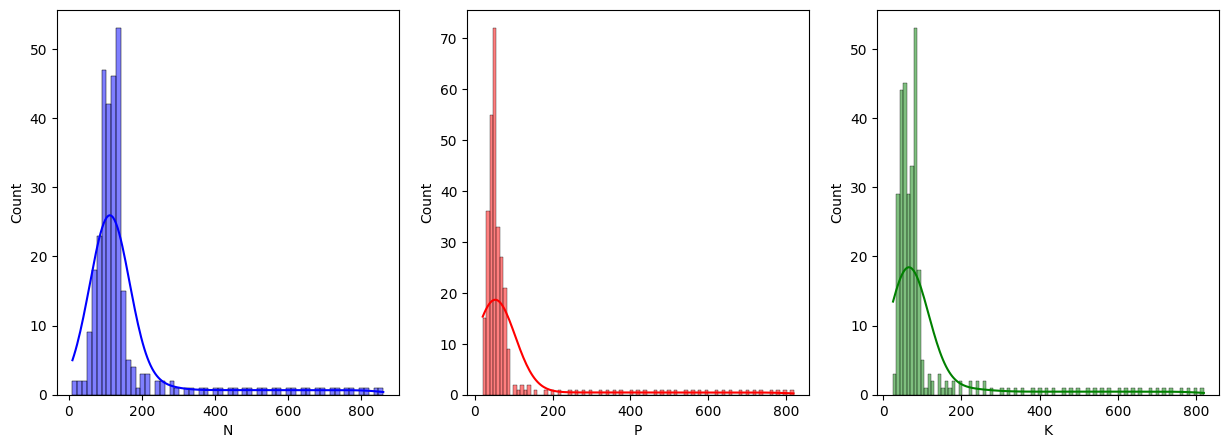

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.histplot(cropdf['N'],color = 'blue', kde = True)

plt.subplot(1,3,2)
sns.histplot(cropdf['P'],color = 'red', kde = True)

plt.subplot(1,3,3)
sns.histplot(cropdf['K'],color = 'green', kde = True)

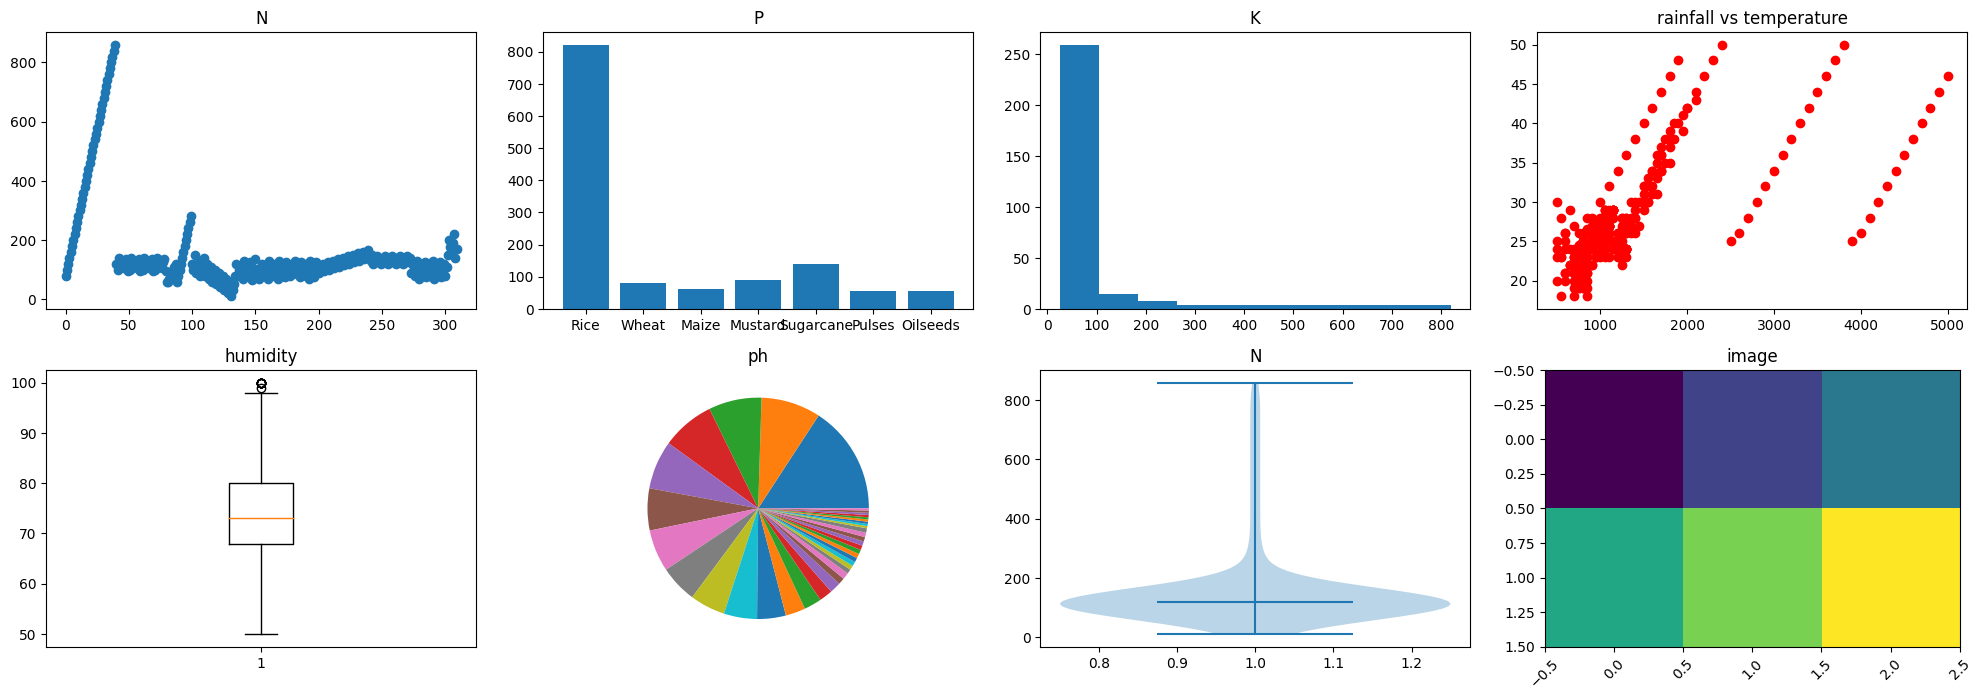

In [ ]:
# group the data by label
grouped = cropdf.groupby('label')

# plot each column using a different plot type
fig, axs = plt.subplots(2, 4, figsize=(20, 7))
plt.xticks(rotation=45)
axs[0, 0].plot(cropdf['N'], marker='o', linestyle='')
axs[0, 0].set_title('N')

axs[0, 1].bar(cropdf['label'], cropdf['P'])
axs[0, 1].set_title('P')

axs[0, 2].hist(cropdf['K'])
axs[0, 2].set_title('K')

axs[0, 3].scatter(cropdf['rainfall'], cropdf['temperature'], c='r')
axs[0, 3].set_title('rainfall vs temperature')

axs[1, 0].boxplot(cropdf['humidity'])
axs[1, 0].set_title('humidity')

axs[1, 1].pie(cropdf['ph'].value_counts())
axs[1, 1].set_title('ph')

axs[1, 2].violinplot(cropdf['N'], showmedians=True)
axs[1, 2].set_title('N')

axs[1, 3].imshow([[0, 1, 2], [3, 4, 5]])
axs[1, 3].set_title('image')


plt.tight_layout()
plt.show()



<ipython-input-59-71e934b15eb9>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



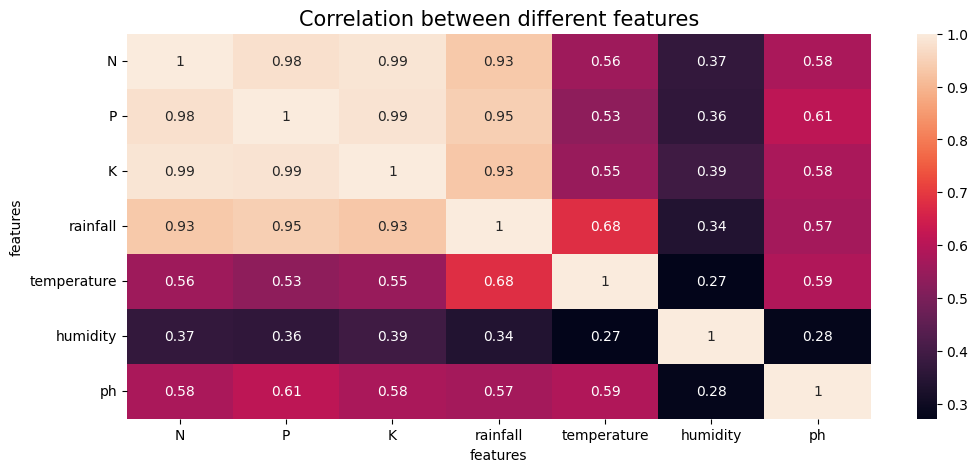

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))
sns.heatmap(cropdf.corr(), annot=True )
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [ ]:
features = cropdf[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = cropdf['label']
labels = cropdf['label']

In [ ]:
#from sklearn import svm
#from sklearn import metrics


In [ ]:
#from sklearn.model_selection import train_test_split
#Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3,random_state =101)

In [ ]:
#clf = svm.SVC()

In [ ]:
#clf.fit(Xtrain,Ytrain)

In [ ]:
#testdf = pd.read_csv("Mp_dataset.csv")

In [ ]:
#Ypred = clf.predict(Xtest)

In [ ]:
#x = metrics.accuracy_score(Ytest, Ypred)
#print("SVM's Accuracy is: ", x)

In [ ]:
#from sklearn.tree import DecisionTreeClassifier

#dtree = DecisionTreeClassifier()

#dtree.fit(Xtrain,Ytrain)

#dtpred= dtree.predict(Xtest)

In [ ]:
#d = metrics.accuracy_score(Ytest, dtpred)
#print("Decision tree's Accuracy is: ", d)

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#rt = RandomForestClassifier()
#rt.fit(Xtrain,Ytrain)
#rt_pred = rt.predict(Xtest)

In [ ]:
#r = metrics.accuracy_score(Ytest, rt_pred)
#print("Random forest's Accuracy is: ", r)

In [ ]:
#from sklearn.naive_bayes import GaussianNB

#NaiveBayes = GaussianNB()

#NaiveBayes.fit(Xtrain,Ytrain)

#predicted_values = NaiveBayes.predict(Xtest)
#x = metrics.accuracy_score(Ytest, predicted_values)
#print("Naive Bayes's Accuracy is: ", x)



In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3,random_state =101)

In [ ]:
testdf = pd.read_csv("Mp_dataset.csv")

In [ ]:
X1train, X1test, Y1train, Y1test = train_test_split(features,target,test_size = 0.3,random_state =99)

In [ ]:
np.random.seed(99)

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=99)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(X1test)

y = metrics.accuracy_score(Y1test, predicted_values)
print("Logistic Regression's Accuracy is: ", y)

Logistic Regression's Accuracy is:  0.6559139784946236


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(X1test)
x = metrics.accuracy_score(Y1test, predicted_values)
print("Naive Bayes's Accuracy is: ", x)

Naive Bayes's Accuracy is:  0.5591397849462365


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(Xtrain,Ytrain)

dtpred= dtree.predict(X1test)

d = metrics.accuracy_score(Y1test, dtpred)
print("Decision tree's Accuracy is: ", d)

Decision tree's Accuracy is:  0.9032258064516129


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier()
rt.fit(Xtrain,Ytrain)
rtpred = rt.predict(X1test)


In [ ]:
r1 = metrics.accuracy_score(Y1test, rtpred)
print("Random forest's Accuracy is: ", r1)

Random forest's Accuracy is:  0.9247311827956989


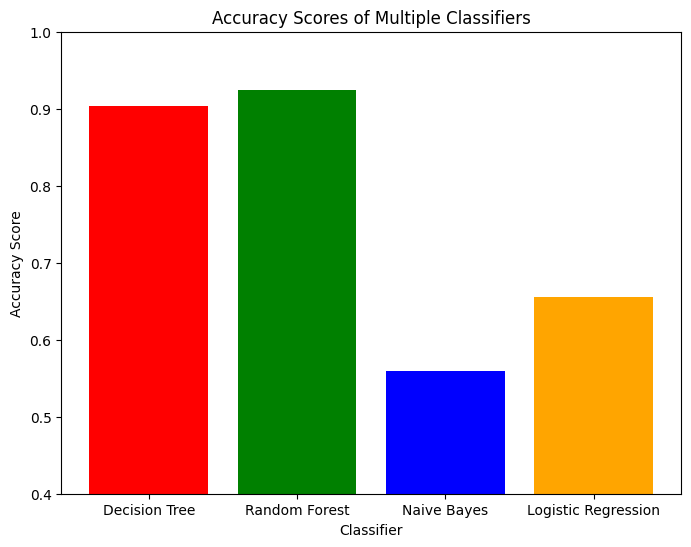

In [ ]:
import matplotlib.pyplot as plt

# create a list of classifiers and their accuracy scores
classifiers = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Logistic Regression']
accuracy_scores = [d, r1, x, y]

# plot the accuracy scores
plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracy_scores, color=['red', 'green', 'blue', 'orange'])
plt.title('Accuracy Scores of Multiple Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.ylim((0.4, 1.0))
plt.show()
